# Volume 3: Pandas 2 (Plotting)
    Patricia D. Bata
    BUDS Program 2019
    August 17, 2019

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
import plotly.graph_objects as go
%matplotlib inline

# Problem 1
Create 3 visualizations for the data in *final_accidents2.pickle* and *final_drivers.pickle*. 
Make one of the visualizations a histogram and one visualization a scatter matrix.
The visualizations should be well labeled and easy to understand.
Include a short description of your plots.

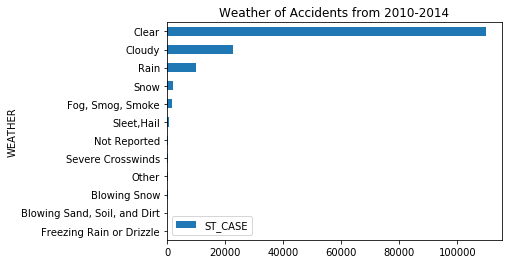

In [3]:
#Assign pickles to variable
#Interesting things to plot: State/location, time, year, drunk, speed, fatals, weather,

a = pd.read_pickle("final_accidents2.pickle")
b = pd.read_pickle("final_drivers.pickle")

#Renaming integers with weather values
wdict = {1: "Clear", 2: "Rain", 3:"Sleet,Hail",4:"Snow",5:"Fog, Smog, Smoke",6:"Severe Crosswinds",
                              7:"Blowing Sand, Soil, and Dirt", 8:"Other",0:"Unknown",10:"Cloudy",11:"Blowing Snow",
                             12:"Freezing Rain or Drizzle", 98:"Not Reported", 99:"Unknown"}
a.WEATHER.replace(wdict, inplace=True) 

#Graphing Frequency of Weather
a.groupby("WEATHER").count().sort_values(by="ST_CASE").plot(kind="barh",y="ST_CASE", title="Weather of Accidents from 2010-2014")
plt.show()

From this bar graph, we see the distribution of the accidents in terms of weather throughout 2010 to 2014. We see that most accidents occured during a clear weather and the second most often weather during accidents is cloudy weather. Often, people assume that accidents occur when it's snowing or raining due to the slick roads, however this graph tells us otherwise.

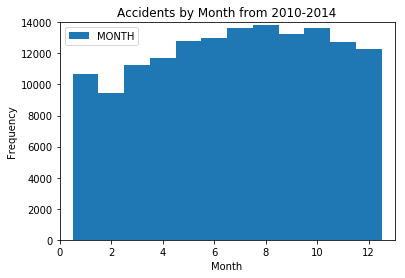

In [4]:
#Graphing accidents by month (histogram)
a.plot(kind="hist",y="MONTH", title="Accidents by Month from 2010-2014", bins=np.arange(14)-0.5)
plt.axis([0,13,0,14000])
plt.xlabel("Month")
plt.show()

From this histogram we see that most of the accidents occured in August and July. The least number of accidents occured in February and January.

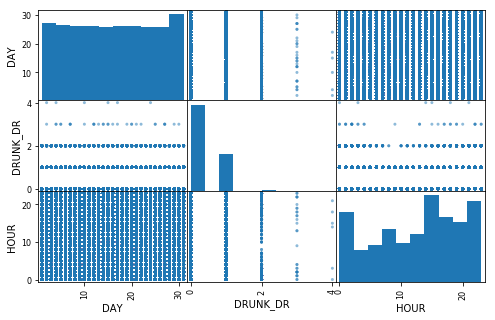

In [5]:
#Scatterplot of: day, drunk drivers, hour
a
pd.plotting.scatter_matrix(a[["DAY", "DRUNK_DR", "HOUR"]],figsize = (8,5))
plt.show()

From the graph above, we see that the accidents for the days in the month have a relatively uniform distribution. We also see that for accidents with 3 to 4 drunk drivers, the common hour of the accident is early in the morning and late at night.

# Problem 2
Using the accident data from the previous problem, identify if a trend exists between FATALS and the following variables:
1. WEATHER
2. DRINKING
3. SP

Support each claim with a clear, labeled visualization and a short description of how the visualization supports your claim.

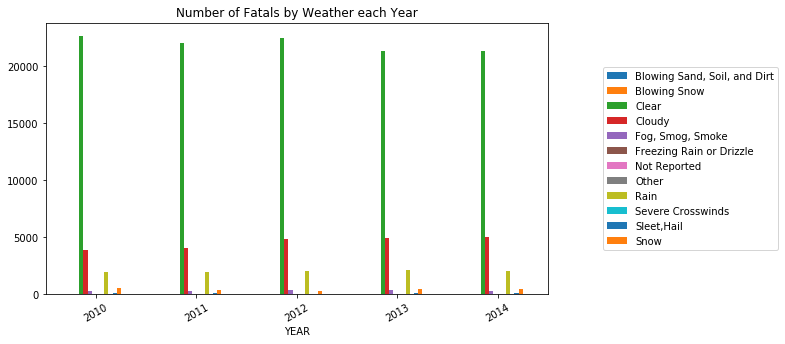

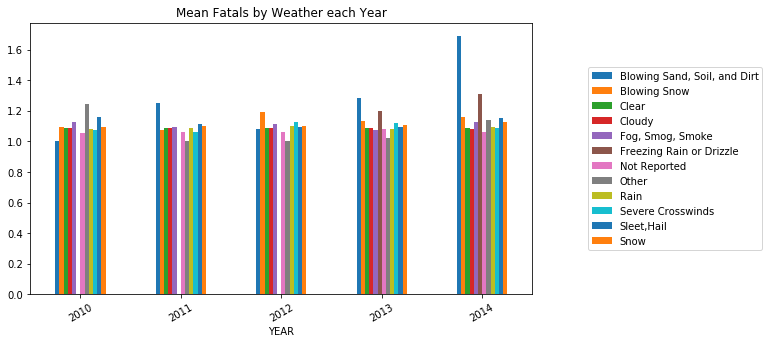

In [6]:
#Pivot Table of year as index and columns as fatals per weather (count and mean)
a.pivot_table(values="FATALS",index= "YEAR",columns="WEATHER",aggfunc="count").fillna(0).plot(kind="bar", rot=30,figsize=(9,5),title="Number of Fatals by Weather each Year").legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
a.pivot_table(values="FATALS",index= "YEAR",columns="WEATHER",aggfunc="mean").fillna(0).plot(kind="bar", rot=30,figsize=(9,5),title="Mean Fatals by Weather each Year").legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
plt.show()

The graphs above shows the number of fatals and mean number of fatals per weather every year. In the first graph we see that consistently over the years, the most number of fatals occur in clear weather while the second most occur in cloudy weather. From here we can say that there is a trend on the fatals per weather.

However, in the second graph, we see that the means for each weather per year are relatively close to each other. The only exception to this are the out-of-the-ordinary weather conditions such as Blowing Sand, Soil and Dirt and Blowing Snow. This means that given the weather of an accident, it has no effect on the number of deaths per accident.

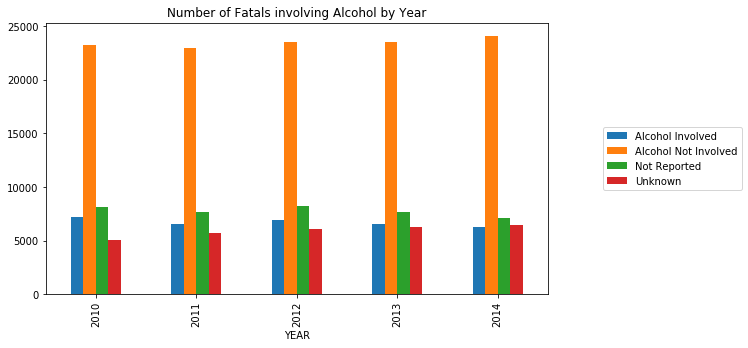

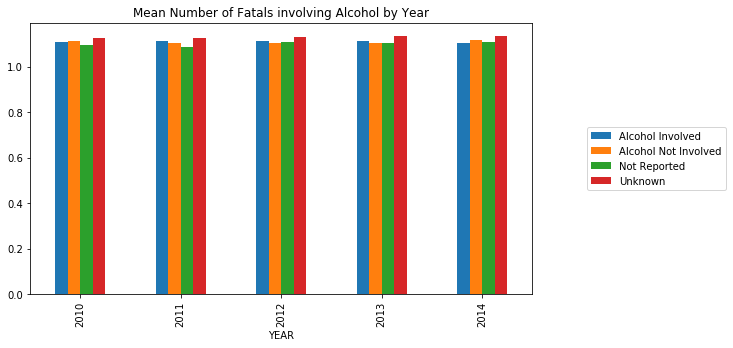

DRINKING,Alcohol Involved,Alcohol Not Involved,Not Reported,Unknown
YEAR,,,,
2010,7240,23269,8170,5117
2011,6581,23001,7638,5765
2012,6969,23503,8269,6137
2013,6595,23510,7634,6259
2014,6265,24121,7105,6492


In [22]:
#Pivot table per year drinking (count and mean)
inner = pd.merge(a, b, on = ["ST_CASE","YEAR"])[['ST_CASE','AGE','DRINKING','FATALS','SP','SPEEDREL','YEAR']]

#Replace the indicator values in DRINKING column to categorical
drinkdict = {0:"Alcohol Not Involved", 1:"Alcohol Involved",8:"Not Reported",9:"Unknown"}
inner.DRINKING.replace(drinkdict, inplace=True )

#Plot the count of fatalities and mean
inner.pivot_table(values="FATALS",index= "YEAR",columns="DRINKING",aggfunc="count").fillna(0).plot(kind="bar",figsize=(9,5),title="Number of Fatals involving Alcohol by Year").legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
inner.pivot_table(values="FATALS",index= "YEAR",columns="DRINKING",aggfunc="mean").fillna(0).plot(kind="bar",figsize=(9,5),title="Mean Number of Fatals involving Alcohol by Year").legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
plt.show()

inner.pivot_table(values="FATALS",index= "YEAR",columns="DRINKING",aggfunc="count")

The graphs above show the number of fatals and mean number of fatals per year. From the first graph, we can see that most fatailities occur when alcohol is not involved.

But when we get the mean of the number of fatals per accident given the driver's state while driving, we see that they are the same whether or not alcohol was involved. So we can say that drinking does not have an effect on fatalities and there is no trend.

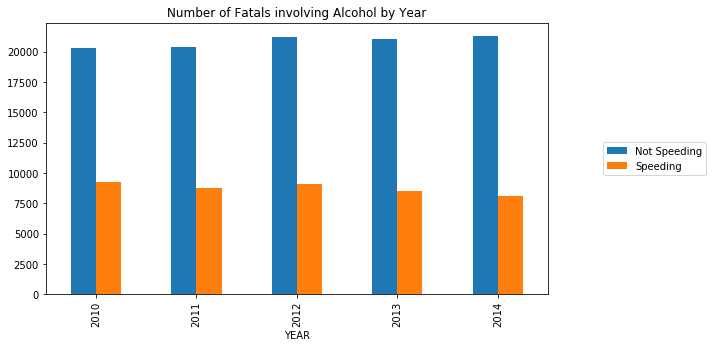

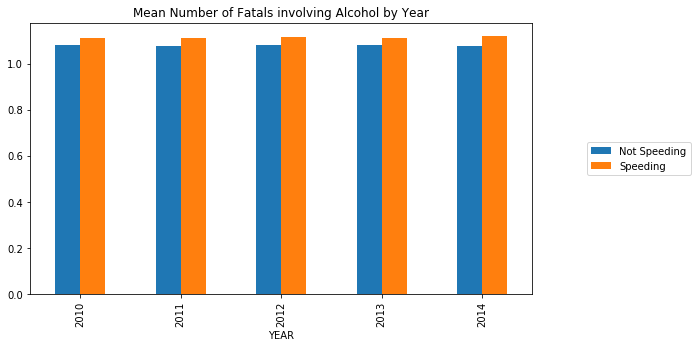

In [8]:
#Replacing indicator values in SP column with categorical values
spdict = {0:"Not Speeding", 1:"Speeding",8:"Not Reported",9:"Unknown"}
a.SP.replace(spdict, inplace=True)

#Plot count and mean
a.pivot_table(values="FATALS",index= "YEAR",columns="SP",aggfunc="count").fillna(0).plot(kind="bar",figsize=(9,5),title="Number of Fatals involving Alcohol by Year").legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
a.pivot_table(values="FATALS",index= "YEAR",columns="SP",aggfunc="mean").fillna(0).plot(kind="bar",figsize=(9,5),title="Mean Number of Fatals involving Alcohol by Year").legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)
plt.show()

The graph above shows the number and mean number of fatailties from accidents that are speeding related and non-speeding related each year. From the first graph we can see that more deaths occur when the driver was not speeding. But from the second graph, we can see that the average number of deaths per accident is consistenly larger in accidents involving speeding each year. From here, we can say that the speed of a car has an effect on the number of fatailities and there is a trend relating fatalities and speeding.

# Problem 3
Using the same data, display a distributional visualization, and provide a brief description and analysis on the following distributions: 

1. The distribution of accidents across the United States
2. The distribution of age in all accidents
3. The distribution of fatalities by the hour which the accident occurs

As usual, all plots should be labeled and easy to read.

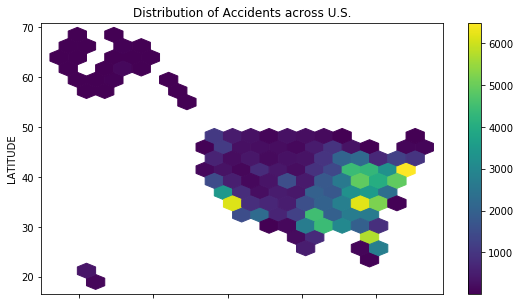

In [9]:
#Choropleth removed since plotly might not be installed.
#Hexbin of Latitude vs. Longitude
a.plot(kind="Hexbin",y="LATITUDE",x="LONGITUD", gridsize=20, mincnt=1,cmap='viridis', figsize=(9,5),title="Distribution of Accidents across U.S.")
plt.xlabel("LONGITUDE")
plt.show()

The hexbin graph shows that majority of car accidents occur on the east coast and from checking the data, the top three states with car accidents are: Texas (TX), California (CA), and Floride (FL). TX and FL are both on the east coast.

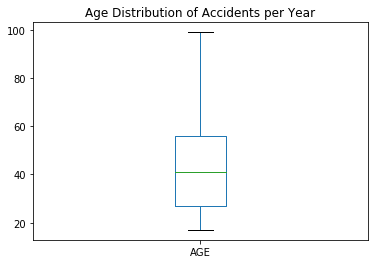

In [10]:
#Boxplot of age distribution throughout the entire 2010-2014
inner[(inner.AGE<100) & (inner.AGE>16)].plot(kind="box",y="AGE", title="Age Distribution of Accidents per Year")
plt.show()

The box plot above shows the distribution of ages in the car accidents. The median age is 41 while the Q1 and Q3 ages are 27 and 56 years old respectively. The box plot above was produced with the data in "final_accidents.pickle" with the ages below 16 and above 100 dropped.

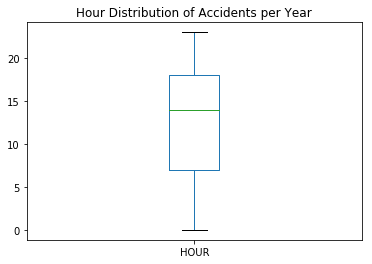

In [11]:
#Boxplot of hour of day distribution throughout the entire 2010-2014
a.plot(kind="box", y="HOUR", title="Hour Distribution of Accidents per Year")
plt.show()

The box plot above shows the distribution of hours of the day accidents from 2010-2014. From here we see the median hour of the day accidents occur is at hour 14 (2PM) while the Q1 and Q3 hours are hour 8 (8AM) and 23 (11PM).

## Problem 4
The *pydataset* module contains numerous data sets, each stored as a pandas DataFrame.
Read data on road accident deaths in the United States using the data set *road* in the *pydataset* module.
Using this data, answer the following questions:

1. Does higher population density indicate higher fuel consumption?

2. Does a correlation exist between number of drivers and number of deaths in a state?

3. Does the temperature of a state in January affect its population density?

Support each claim with a visualization and make sure the visualizations are clearly labelled and easy to understand.
Include any citations provided by the data set.

(Hint: Consider how outliers may be skewing the data.)

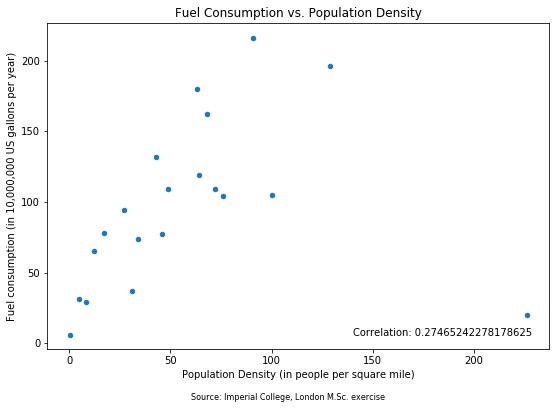

In [12]:
road = data("road")

#Upper and lower bounds per parameter based on Q3 and Q1
outlier = road.describe().loc[["75%","25%"],:].transpose()
outlier["IQ Range"] = (outlier.loc[:,"75%"]-outlier.loc[:,"25%"])*1.5
outlier["LB"] = outlier.loc[:,"25%"]-outlier.loc[:,"IQ Range"]
outlier["UB"] = outlier.loc[:,"IQ Range"]+outlier.loc[:,"75%"]

#Dropped minor outliers on fuel and population: DC, Mass, Conn, Ill, Maryl, Mich; UB(popden) = 289.875 and UB(fuel)=285.375
popfuel = road[(road.popden < outlier.loc["popden","UB"]) & (road.fuel < outlier.loc["fuel","UB"])]
popfuel.plot(kind="scatter",x="popden",y="fuel", title="Fuel Consumption vs. Population Density", figsize=(9, 6))
plt.xlabel("Population Density (in people per square mile)")
plt.ylabel("Fuel consumption (in 10,000,000 US gallons per year)")
plt.annotate("Correlation: {}".format(popfuel["fuel"].corr(popfuel["popden"])), xy = (140,5))
plt.text(60, -40, r"Source: Imperial College, London M.Sc. exercise", fontsize=8)
plt.show()

The outliers removed were those of District of Columbia (DC), Massachussets (Mass), Conn (Conneticut), Ill (Illinois), Maryland (Maryl), and Michigan (Mich) with the upper bounds of population density and fuel are 289.875 and 285.375 respectively. From the scatter plot above, we see that there is little correlation between a state's fuel consumption and population density with a correlation of 0.2747.

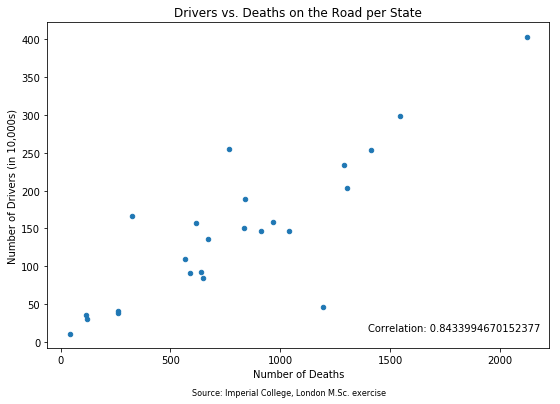

In [13]:
#Minor outliers on drivers and deaths removed: Calif, Ill; UB(deaths) = 2307.125 and UB(drivers)= 435.875
ddeaths=road[(road.drivers < outlier.loc["drivers","UB"]) & (road.deaths < outlier.loc["deaths","UB"])]

#Scatter plot of drivers vs deaths
ddeaths.plot(kind="scatter",x="deaths",y="drivers", title="Drivers vs. Deaths on the Road per State", figsize=(9, 6))
road.sort_values("drivers", ascending=False)
plt.xlabel("Number of Deaths")
plt.ylabel("Number of Drivers (in 10,000s)")
plt.annotate("Correlation: {}".format(ddeaths["deaths"].corr(ddeaths["drivers"])), xy = (1400,15))
plt.text(600, -70, r"Source: Imperial College, London M.Sc. exercise", fontsize=8)
plt.show()

The outliers removed were those of California (Calif) and Illinois (Ill) with the upper bounds of number of deaths and number of drivers are 2307.125 and 435.875 respectively. From the scatter plot above, we see that there is a correlation between a state's number of drivers and number of deaths with a correlation of 0.8434.

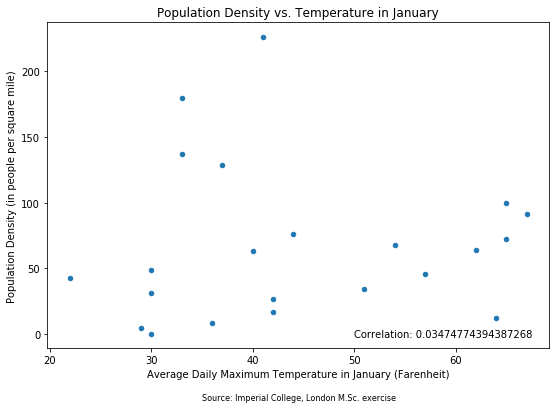

In [14]:
#Minor outliers on temp and popden removed: Conn, DC, Maryl, Mass. UB(temp) = 82.5 and UB(popden)= 289.875
poptemp=road[(road.popden < outlier.loc["popden","UB"]) & (road.temp < outlier.loc["temp","UB"])]

#Scatter plot of population density vs. temperature in january
poptemp.plot(kind="scatter",x="temp",y="popden", title="Population Density vs. Temperature in January", figsize=(9, 6))
road.sort_values("drivers", ascending=False)
plt.xlabel("Average Daily Maximum Temperature in January (Farenheit)")
plt.ylabel("Population Density (in people per square mile)")
plt.annotate("Correlation: {}".format(poptemp["temp"].corr(poptemp["popden"])), xy = (50,-2))
plt.text(35, -50, r"Source: Imperial College, London M.Sc. exercise", fontsize=8)
plt.show()

The outliers removed were those of District of Columbia (DC), Massachussets (Mass), Conn (Conneticut) and Maryland (Maryl)with the upper bounds of population density and temperature are 289.875 and 82.5 respectively. From the scatter plot above, we see that there is no correlation between a state's average temperature in January and its population density with a correlation of 0.0347.

## Problem 5
The file *new_york_crime_clean.csv* contains data on New York City crimes and felonies from 2000-2017 taken from https://www1.nyc.gov/site/nypd/stats/crime-statistics/historical.page.
Use this data to answer the following questions and give visualizations supporting each claim:

1. What are the most common and least common crimes?

2. Does a trend exist between robbery and drug felonies? If so, what is the trend?

3. Which crimes have had the largest distributions?

Use a different style of visualization for each question. 
Make sure that each plot is well labelled and contains citations.

(Hint: Use plt.axis('scaled') or plt.axis('square') to make sure x- and y-axis are the same.)

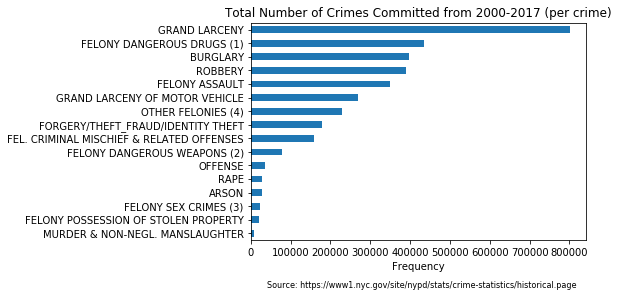

In [15]:
nycrime = pd.read_csv('new_york_crime_clean.csv')

#Sum each crime for all the years 2000-2017, sorted and plotted
nycrime.sum().sort_values().plot(kind="barh", title="Total Number of Crimes Committed from 2000-2017 (per crime)")
plt.xlabel("Frequency")
plt.text(40000, -4, r"Source: https://www1.nyc.gov/site/nypd/stats/crime-statistics/historical.page", fontsize=8)
plt.show()

The **most common crime commited** from 2000 to 2017 is **grand larceny**, while the **least common crime commited** is **murder & non-negligible manslaughter**.

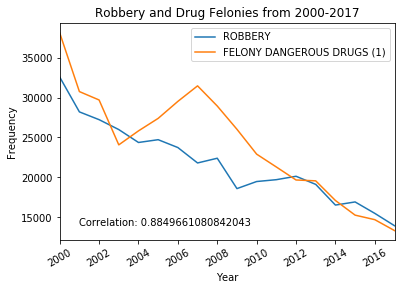

In [16]:
#Set index to Year and created line graph of robbery and felony dangerous drugs (1)
nycrime.set_index("OFFENSE").plot(kind="line", y = ['ROBBERY','FELONY DANGEROUS DRUGS (1)'], rot=30, title="Robbery and Drug Felonies from 2000-2017")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.annotate("Correlation: {}".format(nycrime["ROBBERY"].corr(nycrime["FELONY DANGEROUS DRUGS (1)"])), xy = (2001,14000))
plt.show()

From the graph above, we see that the number of robberies and drug felonies have a similar trend over the years. In general, the two crimes decrease over time at a similar rate. The two have a correlation of 0.8850

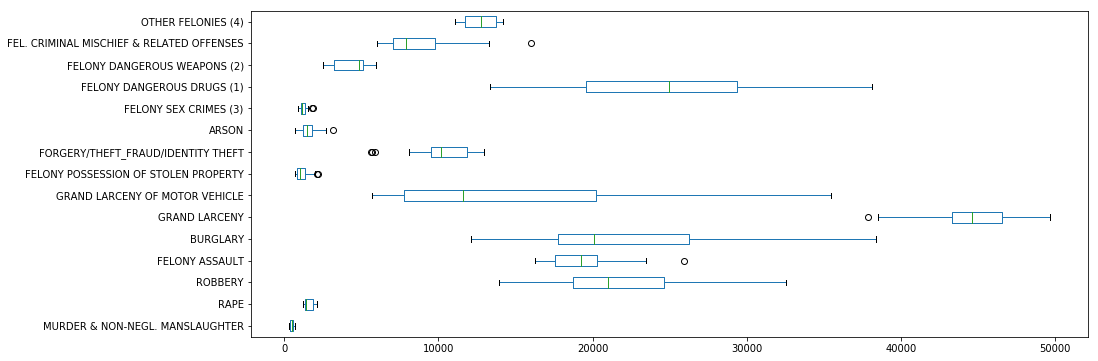

,75%,25%,IQ Range,LB,UB,Range
GRAND LARCENY OF MOTOR VEHICLE,20224.50,7771.25,18679.875,-10908.625,38904.375,12453.25
FELONY DANGEROUS DRUGS (1),29371.00,19598.25,14659.125,4939.125,44030.125,9772.75
BURGLARY,26261.25,17721.75,12809.250,4912.500,39070.500,8539.50
ROBBERY,24634.75,18732.75,8853.000,9879.750,33487.750,5902.00
GRAND LARCENY,46551.00,43328.00,4834.500,38493.500,51385.500,3223.00


In [17]:
#Upper and lower bounds per parameter based on Q3 and Q1 of nycrime (Numerical comparison)
nyoutlier = nycrime.describe().loc[["75%","25%"],:].transpose()
nyoutlier["IQ Range"] = (nyoutlier.loc[:,"75%"]-nyoutlier.loc[:,"25%"])*1.5
nyoutlier["LB"] = nyoutlier.loc[:,"25%"]-nyoutlier.loc[:,"IQ Range"]
nyoutlier["UB"] = nyoutlier.loc[:,"IQ Range"]+nyoutlier.loc[:,"75%"]
nyoutlier["Range"] = nyoutlier.loc[:,"75%"] - nyoutlier.loc[:,"25%"]
nyoutlier.sort_values("Range", ascending=False)

#Graphical comparison to see range of each crime
nycrime.set_index("OFFENSE").plot(kind="box",figsize=(15,6),vert=False)
plt.show()
nyoutlier.sort_values("Range", ascending=False).head()

The box plot above shows the range of all the crimes. The tick marks (whiskers) indicate the interquartile range of each crime and the crimes with the largest ranges are those which have the largest distributions. The top 5 crimes in terms of distirbution are: **grand larceny of motor vehicle, felony dangerous drugs (1), burglary, robbery, grand larceny**.